## Customer Segmentation Part 2 - Unknown Customers

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from math import sqrt

In [5]:
!pip3 install dtw-python

You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from dtw import *

#### Dataframe containing spend behavior over time. Each row represents a customer over time.

In [7]:
spend_df = pd.read_csv('data/spend.csv')

In [8]:
spend_df.head(10)

0           1           2            3           4            5  \
0  104.20  222.064999  294.930696   371.048482  249.467299   430.761457   
1   20.84   22.844314   23.450537    23.541753   27.647598    44.060664   
2  480.32  480.320000  480.320000   480.320000  480.320000   480.320000   
3   66.11   73.590601   87.271050     0.000000  128.486629   127.755778   
4  279.31  701.148045  914.769046  1339.904489  922.542120  1502.797047   
5   15.01   15.010000   15.010000    15.010000   15.010000    15.010000   
6  255.17  255.170000  255.170000   255.170000  255.170000   255.170000   
7  308.22  288.975072  273.759135   312.176403  292.852138   332.654822   
8  168.24   90.348459  174.555454   262.300067   26.161594   121.482360   
9  243.27  220.475525  200.484796   414.867674  910.228834   429.287931   

             6            7            8            9  ...         240  \
0   422.685240   543.019115   443.169206   162.056907  ...  486.682711   
1    41.866000    29.410436    28.967707    33.318657  ...   11.046833   
2   480.320000   480.320000   480.320000   480.320000  ...  480.320000   
3   160.787739   193.902160   163.733368    32.931073  ...  114.550499   
4  2046.708957  2140.300306  1917.039801  1709.618943  ...  914.141576   
5    15.010000    15.010000    15.010000    15.010000  ...   15.010000   
6   255.170000   255.170000   255.170000   255.170000  ...  255.170000   
7   259.518892   191.166612   203.075750   214.750524  ...  717.554887   
8   592.693447     0.000000     0.000000     0.000000  ...    6.331387   
9   163.822618   199.430793   458.465066   938.390841  ...  278.511781   

          241         242         243         244         245         246  \
0  667.679572  705.775346  528.724329  489.586045  586.977256  673.408981   
1    5.515623    9.153193    2.782127    4.660819   40.798448    5.107584   
2  480.320000  480.320000  480.320000  480.320000  480.320000  480.320000   
3  153.475463    0.000000   19.471951   30.468526  115.892388  357.433272   
4  465.939442  387.621939  594.476436  461.259393  420.887935   88.088492   
5   15.010000   15.010000   15.010000   15.010000   15.010000   15.010000   
6  255.170000  255.170000  255.170000  255.170000  255.170000  255.170000   
7  750.292205  819.885078  786.690630  743.484133  812.241954  737.608907   
8   92.595643  722.162184  734.071431  595.173204  320.199318  205.820708   
9  444.156950  821.543067  924.135967  849.341255  513.751574   35.014276   

          247          248          249  
0  532.108810     0.000000     6.314436  
1    0.000000     0.000000     2.689155  
2  480.320000   480.320000   480.320000  
3   82.840733    55.501530     7.089084  
4   87.653135  1707.891081  1498.550280  
5   15.010000    15.010000    15.010000  
6  255.170000   255.170000   255.170000  
7  787.564689   913.562993   868.527779  
8    0.000000    24.463959     0.000000  
9    0.000000    78.891344   103.427517  

[10 rows x 250 columns]

In [9]:
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

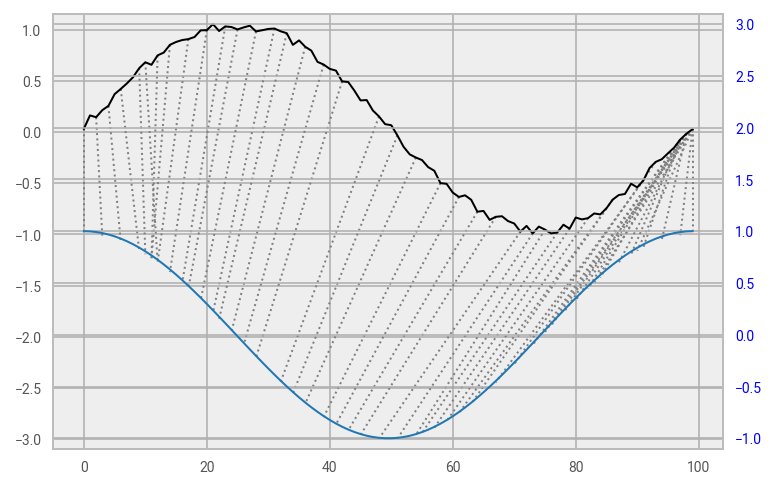

In [10]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)


In [11]:
#!pip3 install tslearn

In [12]:
test = spend_df.iloc[1:10]

In [13]:
from tslearn.metrics import soft_dtw
soft_dtw_score = soft_dtw(test.loc[1], test.loc[2], gamma=.1)
print("Similarity Score between the Two Time Series:")
soft_dtw_score

Similarity Score between the Two Time Series:


53256954.31062376

In [14]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
labels = km.fit_predict(test)

/home/cdsw/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/cdsw/.local/lib/python3.6/site-packages/tslearn/bases.py:14: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [15]:
labels

array([0, 2, 0, 1, 0, 2, 2, 2, 2])

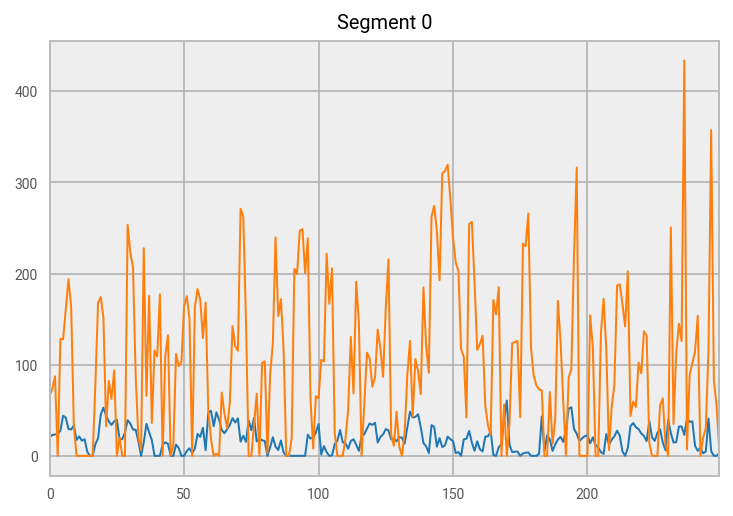

In [16]:
test.iloc[0].plot()
test.iloc[2].plot()
plt.title('Segment 0')
plt.show()

In [17]:
alignment = dtw(test.iloc[0], test.iloc[2], keep_internals=True)

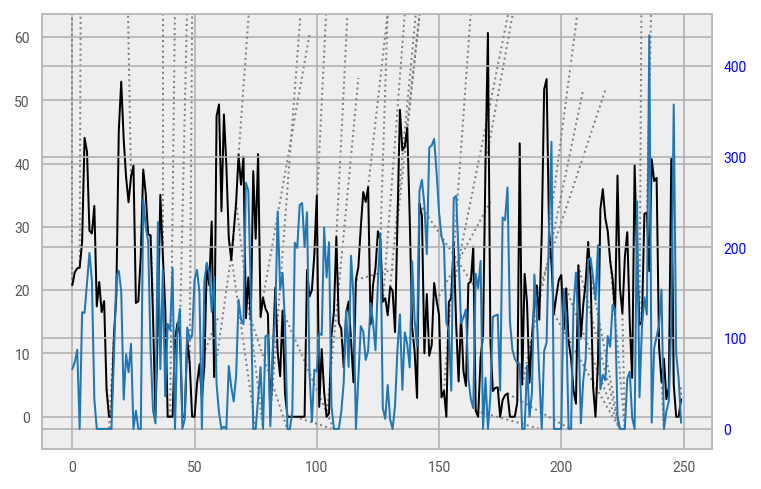

In [18]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(test.iloc[0], test.iloc[2], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

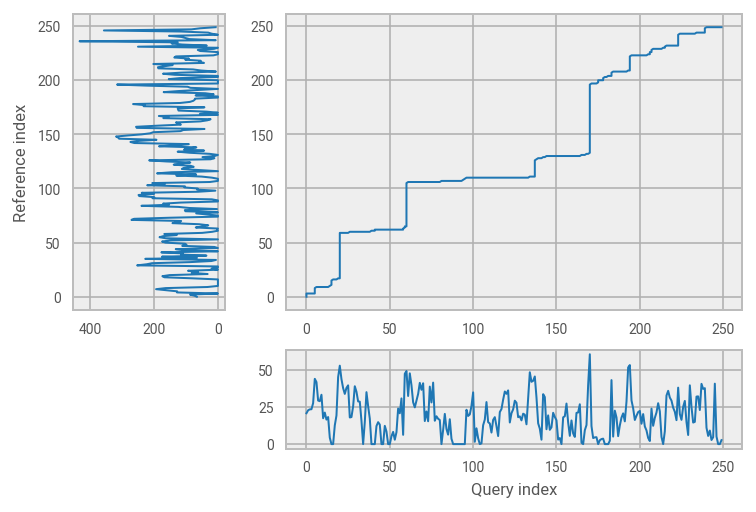

In [19]:
## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

In [20]:
## See the recursion relation, as formula and diagram
#print(rabinerJuangStepPattern(6,"c"))
#rabinerJuangStepPattern(6,"c").plot()

#### Time Series Clustering on Large Scale

In [21]:
def distDTW(ts1, ts2):
     ## this is setup
     DTW={}
     for i in range(len(ts1)):
         DTW[(i, -1)] = np.inf
     for i in range(len(ts2)):
         DTW[(-1, i)] = np.inf
     DTW[(-1, -1)] = 0
 
     ## this is where we actually calculate the optimum
     ## one step at at time
     for i in range(len(ts1)):
         for j in range(len(ts2)):
             dist = (ts1[i] - ts2[j])**2
             DTW[(i, j)] = dist + min(DTW[(i-1, j)],
                                      DTW[(i, j-1)], 
                                      DTW[(i-1, j-1)])
             ## this is an example of dynamic programming
 
     ## once we have found the complete path, we return 
     ## the associated distance
     return sqrt(DTW[len(ts1)-1, len(ts2)-1])

In [22]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score, completeness_score
from sklearn.metrics import pairwise_distances

In [23]:
spend_df = spend_df.loc[:20]

In [24]:
dtw_clustering = AgglomerativeClustering(linkage   = 'average',
                                         n_clusters = 4, 
                                         affinity   = 'precomputed') 

In [25]:
p = pairwise_distances(spend_df, metric = distDTW)

In [26]:
#dtw_clustering.fit(feature_values)

In [27]:
spend_df['segment'] = dtw_clustering.fit_predict(p)

In [28]:
spend_df

0            1           2            3            4            5  \
0   104.20   222.064999  294.930696   371.048482   249.467299   430.761457   
1    20.84    22.844314   23.450537    23.541753    27.647598    44.060664   
2   480.32   480.320000  480.320000   480.320000   480.320000   480.320000   
3    66.11    73.590601   87.271050     0.000000   128.486629   127.755778   
4   279.31   701.148045  914.769046  1339.904489   922.542120  1502.797047   
5    15.01    15.010000   15.010000    15.010000    15.010000    15.010000   
6   255.17   255.170000  255.170000   255.170000   255.170000   255.170000   
7   308.22   288.975072  273.759135   312.176403   292.852138   332.654822   
8   168.24    90.348459  174.555454   262.300067    26.161594   121.482360   
9   243.27   220.475525  200.484796   414.867674   910.228834   429.287931   
10  119.17   559.300529  537.477444   548.566830    72.609872   101.824361   
11  120.20   271.018116  265.825077   127.847674   320.405626   627.452336   
12  204.17   113.785467  114.405385   208.464195    82.902581     1.700275   
13   75.05    75.050000   75.050000    75.050000    75.050000    75.050000   
14  182.26    78.496811    8.145255    14.891765     0.000000   740.488600   
15  150.25  1095.795083  840.889592   364.278648     0.000000    32.976757   
16  325.25   283.563894  357.453477   272.648458   189.056116    91.278566   
17  198.33     0.000000  475.805151     0.000000  1195.851509  1021.068224   
18  224.32     0.000000    0.000000    94.941412     0.000000     0.000000   
19  378.27   631.536026  644.169986   524.022786   685.948627   679.131642   
20  408.34     0.000000    0.000000     0.000000     0.000000     0.000000   

              6            7            8            9  ...         241  \
0    422.685240   543.019115   443.169206   162.056907  ...  667.679572   
1     41.866000    29.410436    28.967707    33.318657  ...    5.515623   
2    480.320000   480.320000   480.320000   480.320000  ...  480.320000   
3    160.787739   193.902160   163.733368    32.931073  ...  153.475463   
4   2046.708957  2140.300306  1917.039801  1709.618943  ...  465.939442   
5     15.010000    15.010000    15.010000    15.010000  ...   15.010000   
6    255.170000   255.170000   255.170000   255.170000  ...  255.170000   
7    259.518892   191.166612   203.075750   214.750524  ...  750.292205   
8    592.693447     0.000000     0.000000     0.000000  ...   92.595643   
9    163.822618   199.430793   458.465066   938.390841  ...  444.156950   
10   244.183585     0.000000     0.000000   380.802437  ...  162.097544   
11   387.799629   829.289994   599.770422     0.000000  ...   32.690780   
12   112.740618   154.024631   226.222928   389.951461  ...  336.990537   
13    75.050000    75.050000    75.050000    75.050000  ...   75.050000   
14   796.793599   513.505383   378.676286     0.000000  ...    0.000000   
15   308.730931    45.289127     0.000000     0.000000  ...  262.709452   
16   216.398054   117.827995    66.204061   114.844725  ...    0.000000   
17     7.448087   870.304371     0.000000  1047.849826  ...    0.000000   
18   513.262824   724.145904     0.000000   298.549937  ...    0.000000   
19   743.063208   729.122036   612.987761   474.776339  ...  771.404588   
20     0.000000     0.000000     0.000000     0.000000  ...    0.000000   

           242         243          244          245          246  \
0   705.775346  528.724329   489.586045   586.977256   673.408981   
1     9.153193    2.782127     4.660819    40.798448     5.107584   
2   480.320000  480.320000   480.320000   480.320000   480.320000   
3     0.000000   19.471951    30.468526   115.892388   357.433272   
4   387.621939  594.476436   461.259393   420.887935    88.088492   
5    15.010000   15.010000    15.010000    15.010000    15.010000   
6   255.170000  255.170000   255.170000   255.170000   255.170000   
7   819.885078  786.690630   743.484133   812.241954   737.608907   
8   722.162184  734.